In [ ]:
pip install mysql-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 25.6 MB/s eta 0:00:00


In [ ]:
import requests
import csv

# Bing API setup
subscription_key = '3254105a8ab2496b8f78a98035336b89'
search_url = "https://api.bing.microsoft.com/v7.0/news/search"
search_term = "Privacy and security attacks on LLM"
headers = {"Ocp-Apim-Subscription-Key": subscription_key}
params = {"q": search_term, "mkt": "en-US", "count": 200}

try:
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    news_results = response.json()

    articles = news_results.get('value', [])
    if articles:
        with open('LLM_articles.csv', mode='w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(['Name', 'Description', 'Date Published', 'URL', 'Publisher'])

            for article in articles:
                # Extract relevant data
                name = article.get('name')
                description = article.get('description', '')
                date_published = article.get('datePublished')
                url = article.get('url')
                publisher = article.get('provider', [{}])[0].get('name', 'Unknown')

                # Write data to CSV
                writer.writerow([name, description, date_published, url, publisher])

        print("Articles saved to CSV successfully.")
    else:
        print("No articles found")

except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/news_dataset.csv'
news_dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
news_dataset.head()


,Unnamed: 0,title,description,URL,Date Published,Publisher,published_year,Published Month,Description
0,0,Top LLM vulnerabilities and how to mitigate th...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiRGh0d...,2024-01-10 08:00:00+00:00,Help Net Security,2024.0,2024-01,NaN
1,1,LLM Vulnerabilities: Understanding and Safegua...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMieWh0d...,2023-12-14 08:00:00+00:00,hackernoon.com,2023.0,2023-12,NaN
2,2,"LLMs Pose Major Security Risks, Serving As 'At...","<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiKmh0d...,2023-11-06 08:00:00+00:00,C3 AI,2023.0,2023-11,NaN
3,3,Top 10 LLM Vulnerabilities - Unite.AI,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiMGh0d...,2023-09-07 07:00:00+00:00,Unite.AI,2023.0,2023-09,NaN
4,4,GPU memory vulnerability could allow hackers t...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMimAFod...,2024-01-19 08:00:00+00:00,ITPro,2024.0,2024-01,NaN


<ipython-input-7-68096298a815>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = news_dataset['Date Published'].dt.to_period('M').value_counts().sort_index()


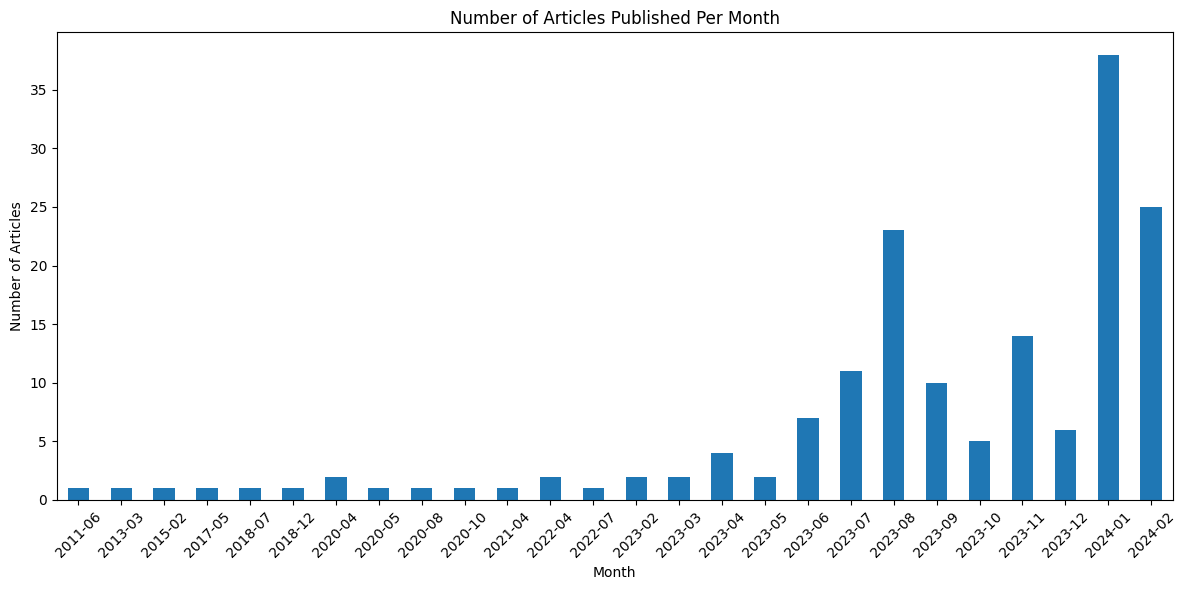

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

news_dataset['Date Published'] = pd.to_datetime(news_dataset['Date Published'])

monthly_counts = news_dataset['Date Published'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Number of Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-8-8529dbdb246a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts, y=publisher_counts.index, palette='viridis')


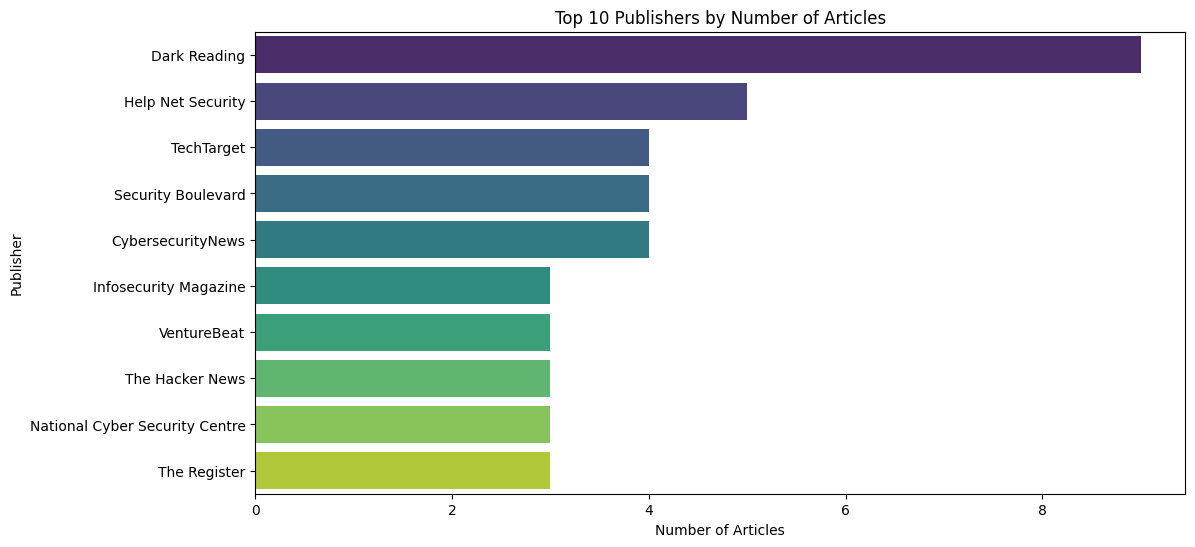

In [ ]:
publisher_counts = news_dataset['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts, y=publisher_counts.index, palette='viridis')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')

plt.show()


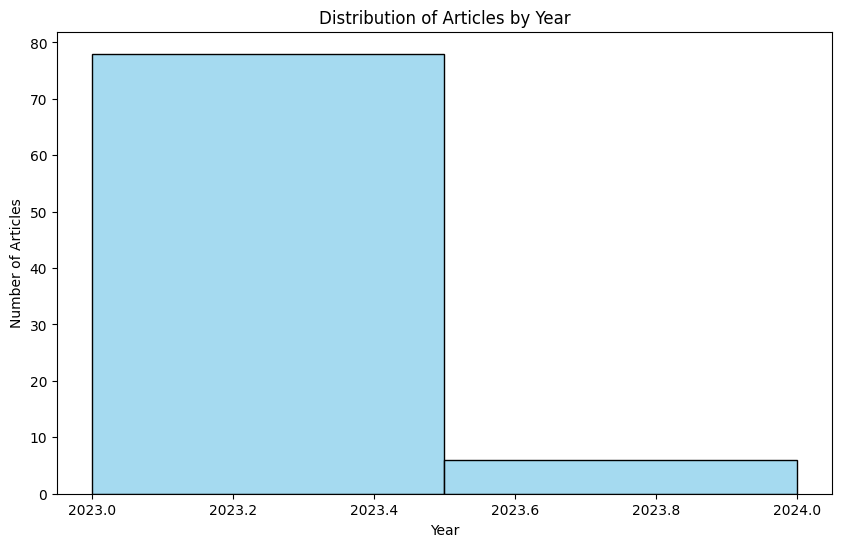

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(news_dataset['published_year'].dropna(), bins=int(news_dataset['published_year'].nunique()), kde=False, color='skyblue')
plt.title('Distribution of Articles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

plt.show()

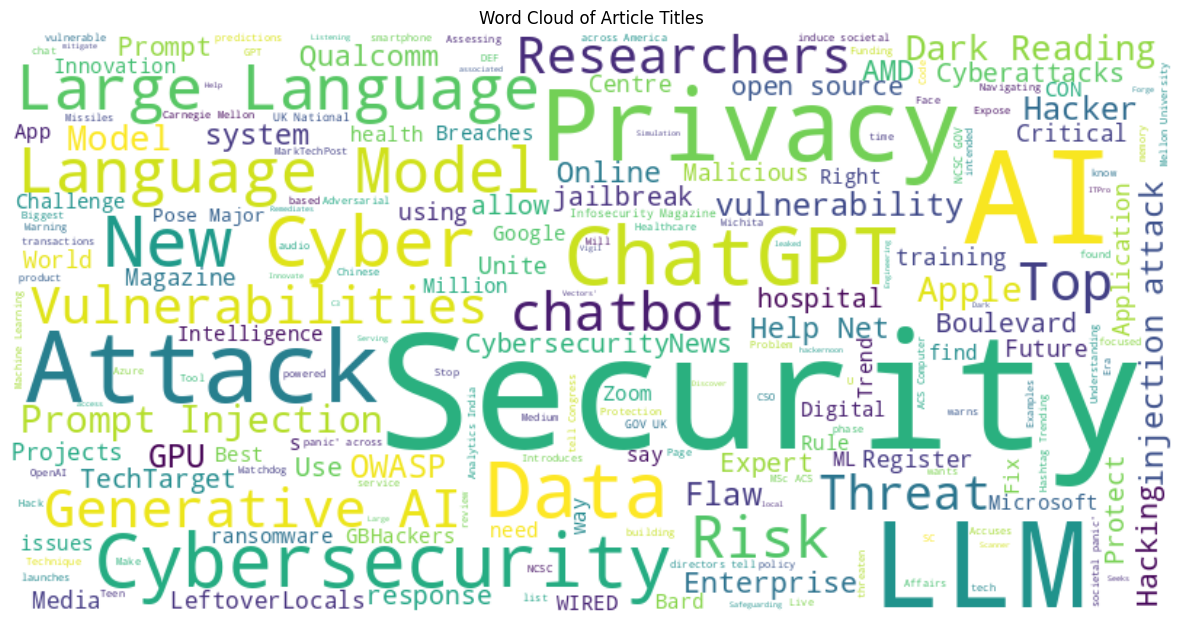

In [ ]:
from wordcloud import WordCloud
all_titles = ' '.join(news_dataset['title'].dropna())

# Generating the word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(all_titles)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Article Titles')
plt.show()

<ipython-input-16-efa605d09304>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news_dataset['MonthYear'] = news_dataset['Date Published'].dt.to_period('M')


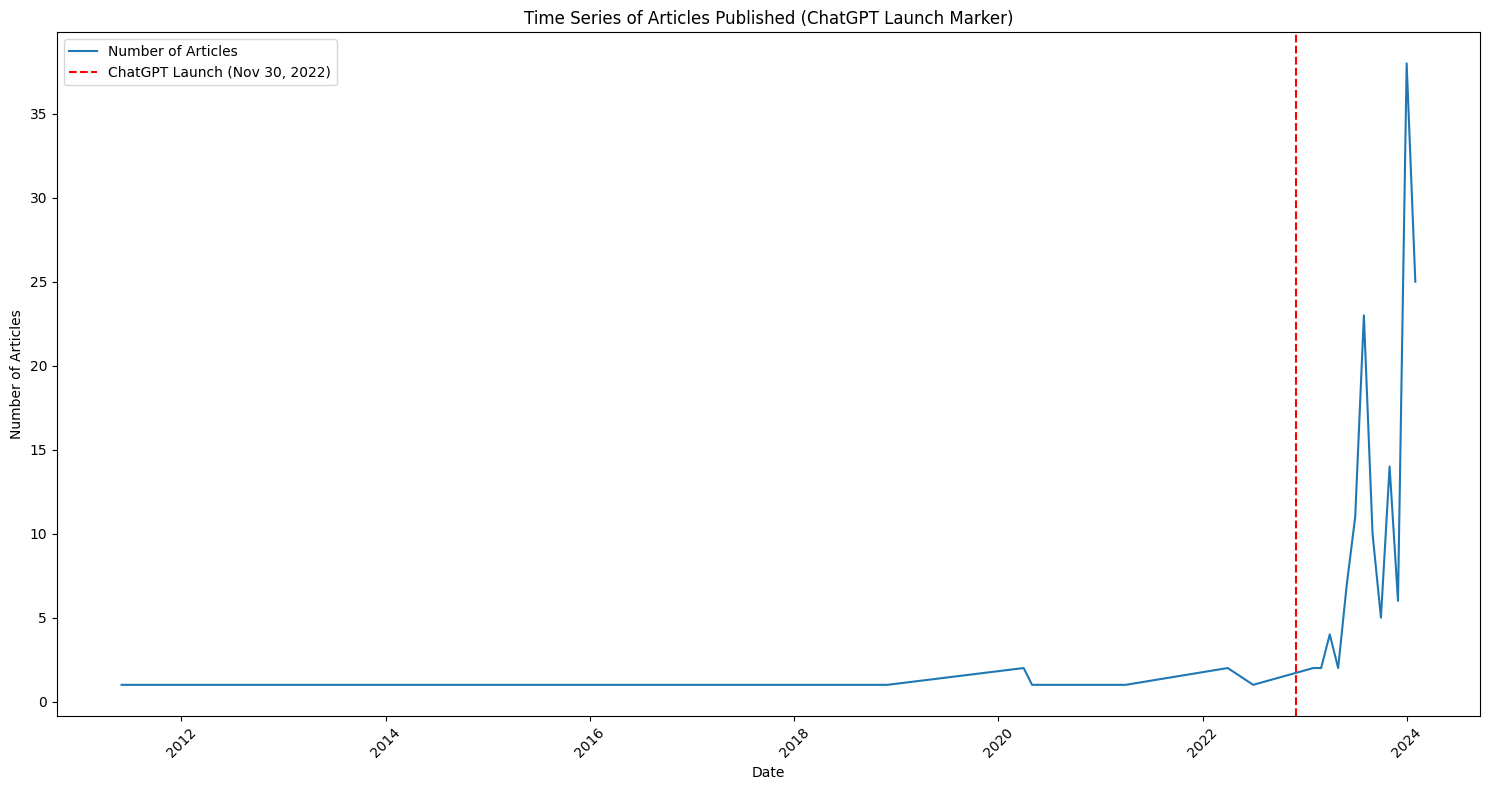

In [ ]:
# Simplified approach to plot the time series with the ChatGPT launch date marker

# Re-creating the monthly counts with a simpler method
news_dataset['MonthYear'] = news_dataset['Date Published'].dt.to_period('M')
simplified_monthly_counts = news_dataset.groupby('MonthYear').size()

# Converting the index back to datetime for plotting
simplified_monthly_counts.index = simplified_monthly_counts.index.to_timestamp()

# Plotting the time series
plt.figure(figsize=(15, 8))
plt.plot(simplified_monthly_counts.index, simplified_monthly_counts, label='Number of Articles', linestyle='-')

# Adding a marker for the ChatGPT launch date
plt.axvline(chatgpt_launch_date, color='red', linestyle='--', label='ChatGPT Launch (Nov 30, 2022)')

# Adding labels and title
plt.title('Time Series of Articles Published (ChatGPT Launch Marker)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-17-0fc87d590e7c>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news_dataset['MonthYear'] = news_dataset['Date Published'].dt.to_period('M')


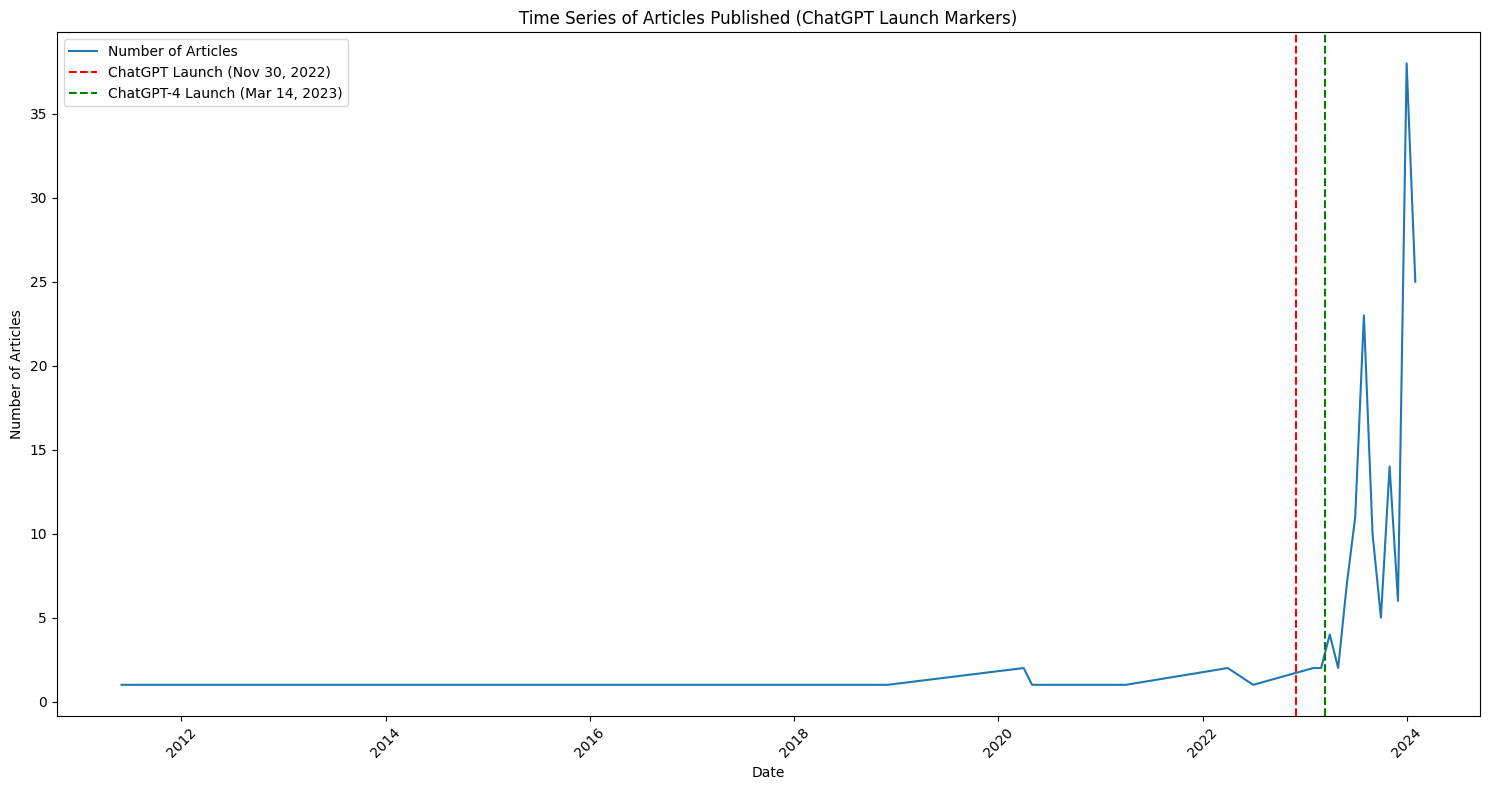

In [ ]:
# Prepare the data
news_dataset['Date Published'] = pd.to_datetime(news_dataset['Date Published'])
news_dataset['MonthYear'] = news_dataset['Date Published'].dt.to_period('M')
simplified_monthly_counts = news_dataset.groupby('MonthYear').size()
simplified_monthly_counts.index = simplified_monthly_counts.index.to_timestamp()

# Define the ChatGPT and ChatGPT-4 launch dates
chatgpt_launch_date = pd.to_datetime('2022-11-30')
chatgpt4_launch_date = pd.to_datetime('2023-03-14')

# Plotting the time series
plt.figure(figsize=(15, 8))
plt.plot(simplified_monthly_counts.index, simplified_monthly_counts, label='Number of Articles', linestyle='-')

# Adding markers for the ChatGPT and ChatGPT-4 launch dates
plt.axvline(chatgpt_launch_date, color='red', linestyle='--', label='ChatGPT Launch (Nov 30, 2022)')
plt.axvline(chatgpt4_launch_date, color='green', linestyle='--', label='ChatGPT-4 Launch (Mar 14, 2023)')

# Adding labels and title
plt.title('Time Series of Articles Published (ChatGPT Launch Markers)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()